In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica'], 'size': '12', 'weight':'bold'})
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)
plt.rcParams['text.usetex'] = False

from matplotlib.font_manager import FontProperties
fontP = FontProperties()
fontP.set_size('6')
%matplotlib inline

# Hydration site analysis - without restraints

In [28]:
apo_b1_hsa = np.loadtxt("/Users/chuankai/0-Research/4-Plant-Hormones/3-ABA/pyl2_water/analysis_no_restraints/pyl2_inactive/1-block1/\
run_hsa/SSTMap_HSA/pyl2_inactive_hsa_summary.txt", skiprows=1, usecols=list(range(0,27)))

apo_b2_hsa = np.loadtxt("/Users/chuankai/0-Research/4-Plant-Hormones/3-ABA/pyl2_water/analysis_no_restraints/pyl2_inactive/2-block2/\
run_hsa/SSTMap_HSA/pyl2_inactive_hsa_summary.txt", skiprows=1, usecols=list(range(0,27)))

apo_b3_hsa = np.loadtxt("/Users/chuankai/0-Research/4-Plant-Hormones/3-ABA/pyl2_water/analysis_no_restraints/pyl2_inactive/3-whole/\
run_hsa/SSTMap_HSA/pyl2_inactive_hsa_summary.txt", skiprows=1, usecols=list(range(0,27)))

holo_b1_hsa = np.loadtxt("/Users/chuankai/0-Research/4-Plant-Hormones/3-ABA/pyl2_water/analysis_no_restraints/pyl2_active/1-block1/\
run_hsa/SSTMap_HSA/pyl2_active_hsa_summary.txt",   skiprows=1, usecols=list(range(0,27)))

holo_b1_hsa_new = np.zeros((11,27))
holo_b1_hsa_new[0:9, :] = holo_b1_hsa[0:9,:]
holo_b1_hsa_new[9]      = np.mean(holo_b1_hsa[9:11,:], axis=0)
holo_b1_hsa_new[-1]     = holo_b1_hsa[-1]
holo_b1_hsa = holo_b1_hsa_new

holo_b2_hsa = np.loadtxt("/Users/chuankai/0-Research/4-Plant-Hormones/3-ABA/pyl2_water/analysis_no_restraints/pyl2_active/2-block2/\
run_hsa/SSTMap_HSA/pyl2_active_hsa_summary.txt",   skiprows=1, usecols=list(range(0,27)))

holo_b3_hsa = np.loadtxt("/Users/chuankai/0-Research/4-Plant-Hormones/3-ABA/pyl2_water/analysis_no_restraints/pyl2_active/3-whole/\
run_hsa/SSTMap_HSA/pyl2_active_hsa_summary.txt",   skiprows=1, usecols=list(range(0,27)))

holo_b3_hsa_new = np.zeros((12,27))
holo_b3_hsa_new[0:9, :] = holo_b3_hsa[0:9,:]
holo_b3_hsa_new[9]      = np.mean(holo_b3_hsa[9:11,:], axis=0)
holo_b3_hsa_new[10:, :]     = holo_b3_hsa[10:, :]
holo_b3_hsa = holo_b3_hsa_new

In [7]:
holo_b3_hsa = np.loadtxt("/Users/chuankai/0-Research/4-Plant-Hormones/3-ABA/pyl2_water/analysis_no_restraints/pyl2_active/3-whole/\
run_hsa/SSTMap_HSA/pyl2_active_hsa_summary.txt",   skiprows=1, usecols=list(range(0,27)))

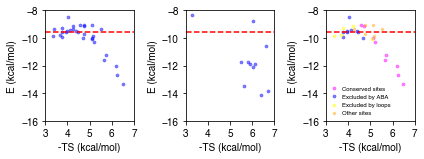

In [3]:
ax0 = plt.subplot2grid((2,3),(0,0))
ax0.scatter(-apo_b3_hsa.T[16], apo_b3_hsa.T[12], color='blue', s=10, linewidths=0.5, alpha=0.5)
ax0.plot(np.linspace(3,7,num=101), -9.53*np.ones(101),color='red', linestyle='--')
ax0.set_xlim(3,7)
ax0.set_ylim(-16,-8)
ax0.set_xticks((3,4,5,6,7))
ax0.set_yticks((-16,-14,-12,-10,-8))
ax0.set_xlabel(r'-TS (kcal/mol)', fontweight="bold")
ax0.set_ylabel(r"E (kcal/mol)",   fontweight="bold")
ax1 = plt.subplot2grid((2,3),(0,1))
ax1.scatter(-holo_b3_hsa.T[16], holo_b3_hsa.T[12], color='blue', s=10, linewidths=0.5, alpha=0.5)
ax1.plot(np.linspace(3,7,num=101), -9.53*np.ones(101),color='red', linestyle='--')
ax1.set_xlim(3,7)
ax1.set_ylim(-16,-8)
ax1.set_xticks((3,4,5,6,7))
ax1.set_yticks((-16,-14,-12,-10,-8))
ax1.set_xlabel(r'-TS (kcal/mol)', fontweight="bold")
ax1.set_ylabel(r"E (kcal/mol)",   fontweight="bold")
ax2 = plt.subplot2grid((2,3),(0,2))
ax2.set_xlim(3,7)
ax2.set_ylim(-16,-8)
ax2.set_xticks((3,4,5,6,7))
ax2.set_yticks((-16,-14,-12,-10,-8))
ax2.set_xlabel(r'-TS (kcal/mol)', fontweight="bold")
ax2.set_ylabel(r"E (kcal/mol)",   fontweight="bold")

excluded_aba_idx   = [13,14,15,18,19,20,21,24,25]
excluded_loop_idx  = [16,22,26,27,28]
conserved_idx  = [0,1,2,3,4,5,6,10,11]
elusive_idx    = [7,8,9,12,17,23]
excluded_aba_data  = []
excluded_loop_data = []
conserved_data     = []
elusive_data       = []

for idx in excluded_aba_idx:
    excluded_aba_data.append(apo_b3_hsa[idx])
for idx in excluded_loop_idx:
    excluded_loop_data.append(apo_b3_hsa[idx])
for idx in conserved_idx:
    conserved_data.append(apo_b3_hsa[idx])
for idx in elusive_idx:
    elusive_data.append(apo_b3_hsa[idx])

ax2.scatter(-np.array(conserved_data).T[16], np.array(conserved_data).T[12], color='magenta', label='Conserved sites', s=10, linewidths=0.5, alpha=0.5)
ax2.scatter(-np.array(excluded_aba_data).T[16],  np.array(excluded_aba_data).T[12], color='blue', label='Excluded by ABA', s=10, linewidths=0.5, alpha=0.5)
ax2.scatter(-np.array(excluded_loop_data).T[16],  np.array(excluded_loop_data).T[12], color='yellow', label='Excluded by loops', s=10, linewidths=0.5, alpha=0.5)
ax2.scatter(-np.array(elusive_data).T[16], np.array(elusive_data).T[12], color='orange', label='Other sites', s=10, linewidths=0.1, alpha=0.5)
ax2.plot(np.linspace(3,7,num=101), -9.53*np.ones(101),color='red', linestyle='--')
ax2.legend(loc=3, ncol=1, scatterpoints=1, frameon=False, handlelength = 1, prop=fontP)
plt.tight_layout()
plt.savefig('/Users/chuankai/0-Research/4-Plant-Hormones/3-ABA/pyl2_water/visualizations/pdbs_no_rsts/images/\
Figure_Water.png', figsize=(10,10), dpi=1000, bbox_inches='tight')

0 Fr.F
1 Fr.F
2 En.U
3 Fr.F
4 Fr.F
5 Fr.F
6 Fr.F
7 En.F
8 En.U
9 Fr.F
10 Fr.F
11 En.U
12 En.U
13 En.U
14 En.F
15 En.U
16 En.U
17 Fr.U
18 En.F
19 En.F
20 En.U
21 Fr.F
22 En.F
23 En.U
24 En.F
25 En.U
26 En.U
27 En.F
28 En.F
29 En.U


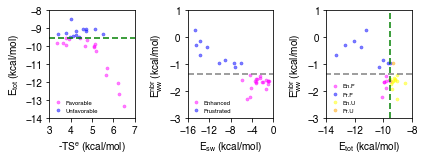

In [4]:
ax0 = plt.subplot2grid((2,3),(0,0))
ax0.plot(np.linspace(3,7,num=101), -9.53*np.ones(101),color='green', linestyle=':',dashes=[4, 2])

en_data = []
fr_data = []
for i in range(len(apo_b3_hsa)):
    if apo_b3_hsa[i][12] < -9.53:
        en_data.append(apo_b3_hsa[i])
    if apo_b3_hsa[i][12] > -9.53:
        fr_data.append(apo_b3_hsa[i])
en_data = np.array(en_data)        
fr_data = np.array(fr_data)

ax0.scatter(-en_data.T[16], en_data.T[12], color='magenta', s=10, linewidths=0.5, alpha=0.5,  label='Favorable')
ax0.scatter(-fr_data.T[16], fr_data.T[12], color='blue', s=10, linewidths=0.5, alpha=0.5, label='Unfavorable')

#ax0.scatter(-apo_b3_hsa.T[16], apo_b3_hsa.T[12], color='blue', s=10, linewidths=0.5, alpha=0.5)
ax0.set_xlim(3,7)
ax0.set_ylim(-14,-8)
ax0.set_xticks((3,4,5,6,7))
ax0.set_yticks((-14,-13,-12,-11,-10,-9,-8))
ax0.set_xlabel(r'-TS$^{e}$ (kcal/mol)', fontweight="bold")
ax0.set_ylabel(r"E$_{tot}$ (kcal/mol)",   fontweight="bold")
ax0.legend(loc=3, ncol=1, scatterpoints=1, frameon=False, handlelength = 1, prop=fontP)

ax1 = plt.subplot2grid((2,3),(0,1))
ax1.plot(np.linspace(-16,0,num=101), -1.36*np.ones(101),color='grey', linestyle=':',dashes=[4, 2])

en_data = []
fr_data = []
for i in range(len(apo_b3_hsa)):
    if apo_b3_hsa[i][13] < -1.36:
        en_data.append(apo_b3_hsa[i])
    if apo_b3_hsa[i][13] > -1.36:
        fr_data.append(apo_b3_hsa[i])
en_data = np.array(en_data)        
fr_data = np.array(fr_data)

ax1.scatter(en_data.T[6], en_data.T[13], color='magenta', s=10, linewidths=0.5, alpha=0.5,  label='Enhanced')
ax1.scatter(fr_data.T[6], fr_data.T[13], color='blue', s=10, linewidths=0.5, alpha=0.5, label='Frustrated')
#ax1.scatter(apo_b3_hsa.T[6], apo_b3_hsa.T[13], color='blue', s=10, linewidths=0.5, alpha=0.5)
ax1.set_xlim(-16,0)
ax1.set_ylim(-3,1)
ax1.set_xticks((-16,-12,-8,-4,0))
ax1.set_yticks((-3, -2,-1,0,1))
ax1.set_xlabel(r'E$_{sw}$ (kcal/mol)', fontweight="bold")
ax1.set_ylabel("$\mathregular{E^{nbr}_{ww}}$ (kcal/mol)",   fontweight="bold")
ax1.legend(loc=3, ncol=1, scatterpoints=1, frameon=False, handlelength = 1, prop=fontP)

ax2 = plt.subplot2grid((2,3),(0,2))
ax2.plot(np.linspace(-16,-8,num=101), -1.36*np.ones(101), color='grey', linestyle=':',dashes=[4, 2])
ax2.plot(-9.53*np.ones(101), np.linspace(-3,1,num=101), color='green', linestyle=':',dashes=[4, 2])

enF_data = []
enU_data = []
frF_data = []
frU_data = []
for i in range(len(apo_b3_hsa)):
    if apo_b3_hsa[i][12] < -9.53 and apo_b3_hsa[i][13] < -1.36:
        print(i, 'En.F')
        enF_data.append(apo_b3_hsa[i])
    if apo_b3_hsa[i][12] > -9.53 and apo_b3_hsa[i][13] < -1.36:
        print(i, 'En.U')
        enU_data.append(apo_b3_hsa[i])
    if apo_b3_hsa[i][12] < -9.53 and apo_b3_hsa[i][13] > -1.36:
        print(i, 'Fr.F')
        frF_data.append(apo_b3_hsa[i])
    if apo_b3_hsa[i][12] > -9.53 and apo_b3_hsa[i][13] > -1.36:
        print(i, 'Fr.U')
        frU_data.append(apo_b3_hsa[i])
enF_data = np.array(enF_data)        
frF_data = np.array(frF_data)
enU_data = np.array(enU_data)        
frU_data = np.array(frU_data)

ax2.scatter(enF_data.T[12], enF_data.T[13], color='magenta', s=10, linewidths=0.5, alpha=0.5,  label='En.F')
ax2.scatter(frF_data.T[12], frF_data.T[13], color='blue', s=10, linewidths=0.5, alpha=0.5, label='Fr.F')
ax2.scatter(enU_data.T[12], enU_data.T[13], color='yellow', s=10, linewidths=0.5, alpha=0.5, label='En.U')
ax2.scatter(frU_data.T[12], frU_data.T[13], color='orange', s=10, linewidths=0.5, alpha=0.5, label='Fr.U')

#ax2.scatter(apo_b3_hsa.T[12], apo_b3_hsa.T[13], color='blue', s=10, linewidths=0.5, alpha=0.5)
ax2.set_xlim(-14,-8)
ax2.set_ylim(-3,1)
ax2.set_xticks((-14,-12,-10,-8))
ax2.set_yticks((-3, -2,-1,0,1))
ax2.set_xlabel(r'E$_{tot}$ (kcal/mol)', fontweight="bold")
ax2.set_ylabel("$\mathregular{E^{nbr}_{ww}}$ (kcal/mol)",   fontweight="bold")
ax2.legend(loc=3, ncol=1, scatterpoints=1, frameon=False, handlelength = 1, prop=fontP)

plt.tight_layout()
plt.savefig('/Users/chuankai/0-Research/4-Plant-Hormones/3-ABA/pyl2_water/visualizations/pdbs_no_rsts/images/\
Figure_Water_APO.png', figsize=(10,10), dpi=1000, bbox_inches='tight')

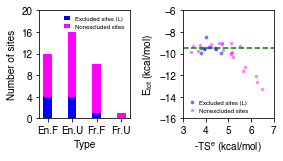

In [5]:
ax1 = plt.subplot2grid((2,3),(0,1))
ax1.set_xlim(3,7)
ax1.set_ylim(-16,-6)
ax1.set_xticks((3,4,5,6,7))
ax1.set_yticks((-16,-14,-12,-10,-8,-6))
ax1.set_xlabel(r'-TS$^{e}$ (kcal/mol)', fontweight="bold")
ax1.set_ylabel(r"E$_{tot}$ (kcal/mol)",   fontweight="bold")

excluded_idx   = [13,14,15,18,19,20,21,24,25]
elusive_idx    = [0,1,2,3,4,5,6,7,8,9,10,11,12,16,17,22,23,26,27,28,29]
excluded_data  = []
elusive_data   = []

for idx in excluded_idx:
    excluded_data.append(apo_b3_hsa[idx])
for idx in elusive_idx:
    elusive_data.append(apo_b3_hsa[idx])

ax1.scatter(-np.array(excluded_data).T[16], np.array(excluded_data).T[12], color='blue', label='Excluded sites (L)', s=10, linewidths=0.5, alpha=0.5)
ax1.scatter(-np.array(elusive_data).T[16], np.array(elusive_data).T[12], color='magenta', label='Nonexcluded sites', s=10, linewidths=0.1, alpha=0.5)
ax1.plot(np.linspace(3,7,num=101), -9.53*np.ones(101),color='green', linestyle='--')
ax1.legend(loc=3, ncol=1, scatterpoints=1, frameon=False, handlelength = 1, prop=fontP)

ax2 = plt.subplot2grid((2,3),(0,0))
ax2.set_ylim(0,20)
ax2.set_yticks((0,4,8,12,16,20))
ax2.set_xlabel(r"Type", fontweight="bold")
ax2.set_ylabel(r"Number of sites", fontweight="bold")

labels = ['En.F', 'En.U', 'Fr.F', 'Fr.U']
excluded_L  = np.array([4, 4, 1, 0])
#excluded_P  = np.array([0, 0, 0, 0])
nonexcluded = np.array([8, 12, 9, 1])
width = 0.35       # the width of the bars: can also be len(x) sequence

ax2.bar(labels, excluded_L,  width, label='Excluded sites (L)', color='blue')
#ax2.bar(labels, excluded_P,  width, bottom=excluded_L, label='Excluded sites (P)', color='red')
ax2.bar(labels, nonexcluded, width, bottom=excluded_L, label='Nonexcluded sites', color='magenta')

ax2.legend(loc=1, ncol=1, frameon=False, handlelength = 1, prop=fontP)

plt.tight_layout()
plt.savefig('/Users/chuankai/0-Research/4-Plant-Hormones/Figure_Water_Excluded.png', \
            figsize=(10,10), dpi=1000, bbox_inches='tight')

0 Fr.F
1 Fr.F
2 En.U
3 En.F
4 En.F
5 Fr.F
6 Fr.F
7 En.F
8 Fr.F
9 Fr.F
10 En.U


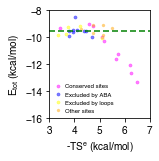

In [6]:
ax2 = plt.subplot2grid((2,3),(0,2))
ax2.set_xlim(3,7)
ax2.set_ylim(-16,-8)
ax2.set_xticks((3,4,5,6,7))
ax2.set_yticks((-16,-14,-12,-10,-8))
ax2.set_xlabel(r'-TS$^{e}$ (kcal/mol)', fontweight="bold")
ax2.set_ylabel(r"E$_{tot}$ (kcal/mol)",   fontweight="bold")

excluded_aba_idx   = [13,14,15,18,19,20,21,24,25]
excluded_loop_idx  = [16,22,26,27,28]
conserved_idx  = [0,1,2,3,4,5,6,10,11,29]
elusive_idx    = [7,8,9,12,17,23]
excluded_aba_data  = []
excluded_loop_data = []
conserved_data     = []
elusive_data       = []

for idx in excluded_aba_idx:
    excluded_aba_data.append(apo_b3_hsa[idx])
for idx in excluded_loop_idx:
    excluded_loop_data.append(apo_b3_hsa[idx])
for idx in conserved_idx:
    conserved_data.append(apo_b3_hsa[idx])
for idx in elusive_idx:
    elusive_data.append(apo_b3_hsa[idx])

ax2.scatter(-np.array(conserved_data).T[16], np.array(conserved_data).T[12], color='magenta', label='Conserved sites', s=10, linewidths=0.5, alpha=0.5)
ax2.scatter(-np.array(excluded_aba_data).T[16],  np.array(excluded_aba_data).T[12], color='blue', label='Excluded by ABA', s=10, linewidths=0.5, alpha=0.5)
ax2.scatter(-np.array(excluded_loop_data).T[16],  np.array(excluded_loop_data).T[12], color='yellow', label='Excluded by loops', s=10, linewidths=0.5, alpha=0.5)
ax2.scatter(-np.array(elusive_data).T[16], np.array(elusive_data).T[12], color='orange', label='Other sites', s=10, linewidths=0.1, alpha=0.5)
ax2.plot(np.linspace(3,7,num=101), -9.53*np.ones(101),color='green', linestyle='--',dashes=[4, 2])
ax2.legend(loc=3, ncol=1, scatterpoints=1, frameon=False, handlelength = 1, prop=fontP)
plt.tight_layout()
plt.savefig('/Users/chuankai/0-Research/4-Plant-Hormones/3-ABA/pyl2_water/visualizations/pdbs_no_rsts/images/\
Figure_Water_Excluded.png', figsize=(10,10), dpi=1000, bbox_inches='tight')

enF_data = []
enU_data = []
frF_data = []
frU_data = []
for i in range(len(holo_b3_hsa)):
    if holo_b3_hsa[i][12] < -9.53 and holo_b3_hsa[i][13] < -1.36:
        print(i, 'En.F')
        enF_data.append(holo_b3_hsa[i])
    if holo_b3_hsa[i][12] > -9.53 and holo_b3_hsa[i][13] < -1.36:
        print(i, 'En.U')
        enU_data.append(holo_b3_hsa[i])
    if holo_b3_hsa[i][12] < -9.53 and holo_b3_hsa[i][13] > -1.36:
        print(i, 'Fr.F')
        frF_data.append(holo_b3_hsa[i])
    if holo_b3_hsa[i][12] > -9.53 and holo_b3_hsa[i][13] > -1.36:
        print(i, 'Fr.U')
        frU_data.append(holo_b3_hsa[i])
enF_data = np.array(enF_data)        
frF_data = np.array(frF_data)
enU_data = np.array(enU_data)        
frU_data = np.array(frU_data)

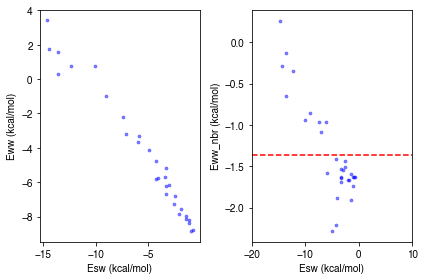

In [7]:
ax0 = plt.subplot2grid((1,2),(0,0))
ax0.scatter(apo_b3_hsa.T[6], apo_b3_hsa.T[9], color='blue', s=10, linewidths=0.5, alpha=0.5)
ax0.set_xlabel(r'Esw (kcal/mol)', fontweight="bold")
ax0.set_ylabel(r"Eww (kcal/mol)",   fontweight="bold")

ax1 = plt.subplot2grid((1,2),(0,1))
ax1.scatter(apo_b3_hsa.T[6], apo_b3_hsa.T[13], color='blue', s=10, linewidths=0.5, alpha=0.5)
ax1.plot(np.linspace(-20,10,num=101), -1.36*np.ones(101),color='red', linestyle='--')
ax1.set_xlim(-20,10)
ax1.set_xlabel(r'Esw (kcal/mol)', fontweight="bold")
ax1.set_ylabel(r"Eww_nbr (kcal/mol)",   fontweight="bold")

plt.tight_layout()

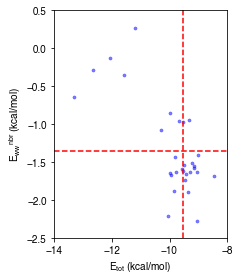

In [8]:
ax0 = plt.subplot2grid((1,2),(0,0))
ax0.scatter(apo_b3_hsa.T[12], apo_b3_hsa.T[13], color='blue', s=10, linewidths=0.5, alpha=0.5)
ax0.set_xlabel(r'E$_{tot}$ (kcal/mol)', fontweight="bold")
ax0.set_ylabel(r"E$_{ww}$$^{nbr}$ (kcal/mol)",   fontweight="bold")
ax0.set_xlim(-14,-8)
ax0.set_ylim(-2.5,0.5)
ax0.plot(np.linspace(-14,-8,num=101), -1.36*np.ones(101),color='red', linestyle='--')
ax0.plot(-9.53*np.ones(101), np.linspace(-2.5,0.5,num=101), color='red', linestyle='--' )
plt.tight_layout()

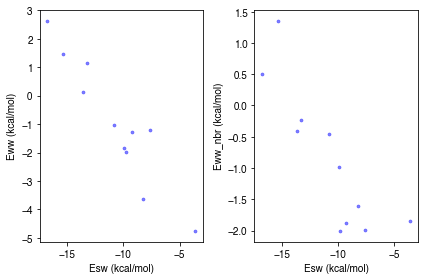

In [9]:
ax0 = plt.subplot2grid((1,2),(0,0))
ax0.scatter(holo_b3_hsa.T[6], holo_b3_hsa.T[9], color='blue', s=10, linewidths=0.5, alpha=0.5)
ax0.set_xlabel(r'Esw (kcal/mol)', fontweight="bold")
ax0.set_ylabel(r"Eww (kcal/mol)",   fontweight="bold")

ax1 = plt.subplot2grid((1,2),(0,1))
ax1.scatter(holo_b3_hsa.T[6], holo_b3_hsa.T[13], color='blue', s=10, linewidths=0.5, alpha=0.5)
ax1.set_xlabel(r'Esw (kcal/mol)', fontweight="bold")
ax1.set_ylabel(r"Eww_nbr (kcal/mol)",   fontweight="bold")
plt.tight_layout()

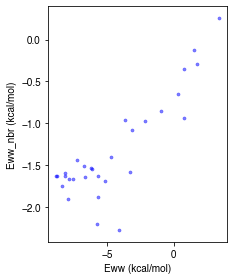

In [10]:
ax1 = plt.subplot2grid((1,2),(0,1))
ax1.scatter(apo_b3_hsa.T[9], apo_b3_hsa.T[13], color='blue', s=10, linewidths=0.5, alpha=0.5)
ax1.set_xlabel(r'Eww (kcal/mol)', fontweight="bold")
ax1.set_ylabel(r"Eww_nbr (kcal/mol)",   fontweight="bold")
plt.tight_layout()

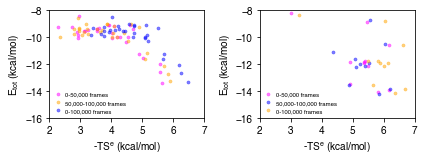

In [11]:
ax0 = plt.subplot2grid((2,2),(0,0))
ax1 = plt.subplot2grid((2,2),(0,1))
ax0.scatter(-apo_b1_hsa.T[16], apo_b1_hsa.T[12], color='magenta',  label='0-50,000 frames', s=10, linewidths=0.5, alpha=0.5)
ax0.scatter(-apo_b2_hsa.T[16], apo_b2_hsa.T[12], color='orange', label='50,000-100,000 frames', s=10, linewidths=0.5, alpha=0.5)
ax0.scatter(-apo_b3_hsa.T[16], apo_b3_hsa.T[12], color='blue',  label='0-100,000 frames', s=10, linewidths=0.5, alpha=0.5)
ax0.set_xlim(2,7)
ax0.set_ylim(-16,-8)
ax0.set_xticks((2,3,4,5,6,7))
ax0.set_yticks((-16,-14,-12,-10,-8))
ax0.set_xlabel(r'-TS$^{e}$ (kcal/mol)', fontweight="bold")
ax0.set_ylabel(r"E$_{tot}$ (kcal/mol)",   fontweight="bold")
ax0.legend(loc=3, ncol=1, scatterpoints=1, frameon=False, handlelength = 1, prop=fontP)
ax1.scatter(-holo_b1_hsa.T[16], holo_b1_hsa.T[12], color='magenta',  label='0-50,000 frames', s=10, linewidths=0.5, alpha=0.5)
ax1.scatter(-holo_b2_hsa.T[16], holo_b2_hsa.T[12], color='blue', label='50,000-100,000 frames', s=10, linewidths=0.5, alpha=0.5)
ax1.scatter(-holo_b3_hsa.T[16], holo_b3_hsa.T[12], color='orange', label='0-100,000 frames', s=10, linewidths=0.5, alpha=0.5)
ax1.set_xlim(2,7)
ax1.set_ylim(-16,-8)
ax1.set_xticks((2,3,4,5,6,7))
ax1.set_yticks((-16,-14,-12,-10,-8))
ax1.set_xlabel(r'-TS$^{e}$ (kcal/mol)', fontweight="bold")
ax1.set_ylabel(r"E$_{tot}$ (kcal/mol)",   fontweight="bold")
ax1.legend(loc=3, ncol=1, scatterpoints=1, frameon=False, handlelength = 1, prop=fontP)
plt.tight_layout()
plt.savefig('/Users/chuankai/0-Research/4-Plant-Hormones/3-ABA/pyl2_water/visualizations/pdbs_no_rsts/images/\
Figure_Water_Convergence.png', figsize=(10,10), dpi=1000, bbox_inches='tight')

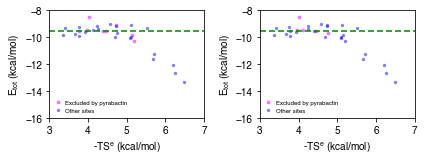

In [12]:
ax0 = plt.subplot2grid((2,2),(0,0))
ax0.set_xlim(3,7)
ax0.set_ylim(-16,-8)
ax0.set_xticks((3,4,5,6,7))
ax0.set_yticks((-16,-14,-12,-10,-8))
ax0.set_xlabel(r'-TS$^{e}$ (kcal/mol)', fontweight="bold")
ax0.set_ylabel(r"E$_{tot}$ (kcal/mol)",   fontweight="bold")
excluded_pyra_idx   = [5,7,12,13,19,20,21,25]
remained_pyra_idx   = [0,1,2,3,4,6,8,9,10,11,14,15,16,17,18,22,23,24,26,27,28,29]
excluded_pyra_data  = []
remained_pyra_data  = []

for idx in excluded_pyra_idx:
    excluded_pyra_data.append(apo_b3_hsa[idx])
for idx in remained_pyra_idx:
    remained_pyra_data.append(apo_b3_hsa[idx])
    
ax0.scatter(-np.array(excluded_pyra_data).T[16], np.array(excluded_pyra_data).T[12], color='magenta', label='Excluded by pyrabactin', s=10, linewidths=0.5, alpha=0.5)
ax0.scatter(-np.array(remained_pyra_data).T[16], np.array(remained_pyra_data).T[12], color='blue',    label='Other sites', s=10, linewidths=0.1, alpha=0.5)
ax0.legend(loc=3, ncol=1, scatterpoints=1, frameon=False, handlelength = 1, prop=fontP)

ax1 = plt.subplot2grid((2,2),(0,1))
ax1.set_xlim(3,7)
ax1.set_ylim(-16,-8)
ax1.set_xticks((3,4,5,6,7))
ax1.set_yticks((-16,-14,-12,-10,-8))
ax1.set_xlabel(r'-TS$^{e}$ (kcal/mol)', fontweight="bold")
ax1.set_ylabel(r"E$_{tot}$ (kcal/mol)",   fontweight="bold")
ax0.plot(np.linspace(3,7,num=101), -9.53*np.ones(101),color='green', linestyle='--',dashes=[4, 2])
ax1.plot(np.linspace(3,7,num=101), -9.53*np.ones(101),color='green', linestyle='--',dashes=[4, 2])
excluded_pyra_idx   = [9,15,20,21,25]
remained_pyra_idx   = [0,1,2,3,4,5,6,7,8,10,11,12,13,14,16,17,18,19,22,23,24,26,27,28,29]
excluded_pyra_data  = []
remained_pyra_data  = []

for idx in excluded_pyra_idx:
    excluded_pyra_data.append(apo_b3_hsa[idx])
for idx in remained_pyra_idx:
    remained_pyra_data.append(apo_b3_hsa[idx])
    
ax1.scatter(-np.array(excluded_pyra_data).T[16], np.array(excluded_pyra_data).T[12], color='magenta', label='Excluded by pyrabactin', s=10, linewidths=0.5, alpha=0.5)
ax1.scatter(-np.array(remained_pyra_data).T[16], np.array(remained_pyra_data).T[12], color='blue',    label='Other sites', s=10, linewidths=0.1, alpha=0.5)
ax1.legend(loc=3, ncol=1, scatterpoints=1, frameon=False, handlelength = 1, prop=fontP)
plt.tight_layout()
plt.savefig('/Users/chuankai/0-Research/4-Plant-Hormones/3-ABA/pyl2_water/visualizations/pdbs_no_rsts/images/\
Figure_Water_pyra.png', figsize=(10,10), dpi=1000, bbox_inches='tight')

In [16]:
# Enthalpy changes 
excluded_idx   = [5,7,9,12,13,19,20,21,25]
bulk_energy    = -9.53

dE, dS = 0, 0
for idx in excluded_idx:
    dE += bulk_energy - apo_b3_hsa.T[12][idx] 
    dS += apo_b3_hsa.T[16][idx]
print(dE, dS)

-0.4147119999999962 -40.434400000000004


In [17]:
# Enthalpy changes 
excluded_idx   = [9,15,20,21,25]
bulk_energy    = -9.53

dE, dS = 0, 0
for idx in excluded_idx:
    dE += bulk_energy - apo_b3_hsa.T[12][idx] 
    dS += apo_b3_hsa.T[16][idx]
print(dE, dS)

-1.0827359999999988 -21.3095


# New figure: conserved sites enthalpy/entropy change

12
0 -1.4803829999999998 -0.13064199999999992
1 -1.8050519999999999 -0.4939039999999997
2 0.36677300000000024 -1.3106150000000003
3 -0.5452309999999994 -0.34923400000000004
4 -0.5483919999999998 0.22543499999999916
5 -1.5943050000000003 -0.6963889999999999
6 -0.21100299999999983 0.8429690000000001
10 -1.9031660000000006 -1.036206
11 -2.7377210000000005 -1.2358539999999998
29 0.9569070000000011 0.1368879999999999
-9.501572999999999 -4.0475520000000005


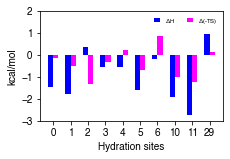

In [33]:
# Enthalpy changes 
conserved_idx   = [0,1,2,3,4,5,6,10,11,29]
holo_idx        = [1,0,2,6,9,5,8,7,3,11]

print(len(holo_b3_hsa.T[16]))

dE, dS = 0, 0
ddEs = []
ddSs = []
for i, idx in enumerate(conserved_idx):
    ddE = holo_b3_hsa.T[12][holo_idx[i]] - apo_b3_hsa.T[12][idx] 
    ddS = holo_b3_hsa.T[16][holo_idx[i]] - apo_b3_hsa.T[16][idx]
    dE += ddE
    dS += ddS
    ddEs.append(ddE)
    ddSs.append(ddS)
    print(idx, ddE, ddS)
print(dE, dS)

ax1 = plt.subplot2grid((2,2),(0,0))
ax1.set_ylim(-3,2)
ax1.set_yticks((-3,-2,-1,0,1,2))

width  = 0.3
index  = np.arange(10)

ax1.bar(np.array(index) + 0.85, ddEs,  width, label=r'$\Delta$H', color='blue')
ax1.bar(np.array(index) + 1.15, ddSs,  width, label=r'$\Delta$(-TS)', color='magenta')
ax1.set_xlabel(r"Hydration sites", fontweight="bold")
ax1.set_xticks(np.array(index)+1)
ax1.set_xticklabels((str(r) for r in conserved_idx))
ax1.set_ylabel(r"kcal/mol", fontweight="bold")
ax1.legend(loc=1, ncol=2, frameon=False, handlelength = 1, prop=fontP)

plt.tight_layout()
plt.savefig('/Users/chuankai/0-Research/4-Plant-Hormones/3-ABA/pyl2_water/\
Figure_Water_HOLO_DIFF.png', figsize=(10,10), dpi=1000, bbox_inches='tight')

In [4]:
list(set(range(30)) - set([5,7,9,12,13,19,20,21,25]))

[0, 1, 2, 3, 4, 6, 8, 10, 11, 14, 15, 16, 17, 18, 22, 23, 24, 26, 27, 28, 29]

In [22]:
holo_b3_hsa.T[12][10] - apo_b3_hsa.T[12][4] 

11.207504

In [24]:
holo_b3_hsa.T[16][10] - apo_b3_hsa.T[16][4]

5.717395

In [25]:
holo_b3_hsa.T[12][10]

0.0

In [26]:
holo_b3_hsa.T[16][10]

0.0

In [29]:
holo_b3_hsa

array([[ 0.0000000e+00,  3.8130000e+01,  2.9810000e+01,  3.7970000e+01,
         9.9698000e+04,  1.0000000e+00, -1.5332267e+01,  2.5083610e+00,
        -1.7840628e+01,  1.4798320e+00, -1.9949600e-01,  1.6793280e+00,
        -1.3852435e+01,  1.3511540e+00, -4.0188180e+00, -2.6738540e+00,
        -6.6926720e+00,  4.4389100e-01,  1.8797000e-02,  2.9012720e+00,
         2.9200690e+00,  1.6966000e-02,            nan,  1.8486000e-02,
         3.1100000e-04,  1.8985340e+00,  1.0027380e+00],
       [ 1.0000000e+00,  3.6730000e+01,  3.2610000e+01,  3.6100000e+01,
         9.8263000e+04,  9.8000000e-01, -1.6772654e+01,  1.0662150e+00,
        -1.7838868e+01,  2.6349730e+00,  8.2262000e-02,  2.5527100e+00,
        -1.4137681e+01,  5.0043800e-01, -3.8370670e+00, -2.5390140e+00,
        -6.3760820e+00,  1.1055130e+00,  5.2414400e-01,  1.9721460e+00,
         2.4962910e+00,  4.0874600e-01,            nan,  5.2035900e-01,
         3.7860000e-03,  9.8075600e-01,  9.9139000e-01],
       [ 2.0000000e+00